In [1]:
import sys
sys.path.insert(1, '../../eispy2d/library/')
import casestudy as cst

In [2]:
import inputdata as ipt
test = ipt.InputData(import_filename='breastphantom.ipt',
                     import_filepath='../../data/breast/class2/phantom1/')
print(test)

Input name: breastphantom.ipt
Configuration file: breastphantom.cfg
Images Resolution: 352x307
Scattered field - measurement samples: 80
Scattered field - source samples: 80
Total field - measurement samples: 108064
Total field - source samples: 80
Relative Permit. map shape: 352x307
Conductivity map shape: 352x307
Indicators: ['zeta_s', 'zeta_p', 'objective_function']
Degrees of Non-Linearity: 0.0126


In [3]:
casestudy = cst.CaseStudy(import_filename='breastphantom.cst',
                          import_filepath='../../data/breast/class2/phantom1/')
print(casestudy)

CASE STUDY
Name: breastphantom.cst
Method: lsm, osm, bim, csi, som, ca
Discretization: Richmond Method (80x80)
Results: done
Test: breastphantom.ipt
Save stochastic runs? no
Number of stochastic runs: 1



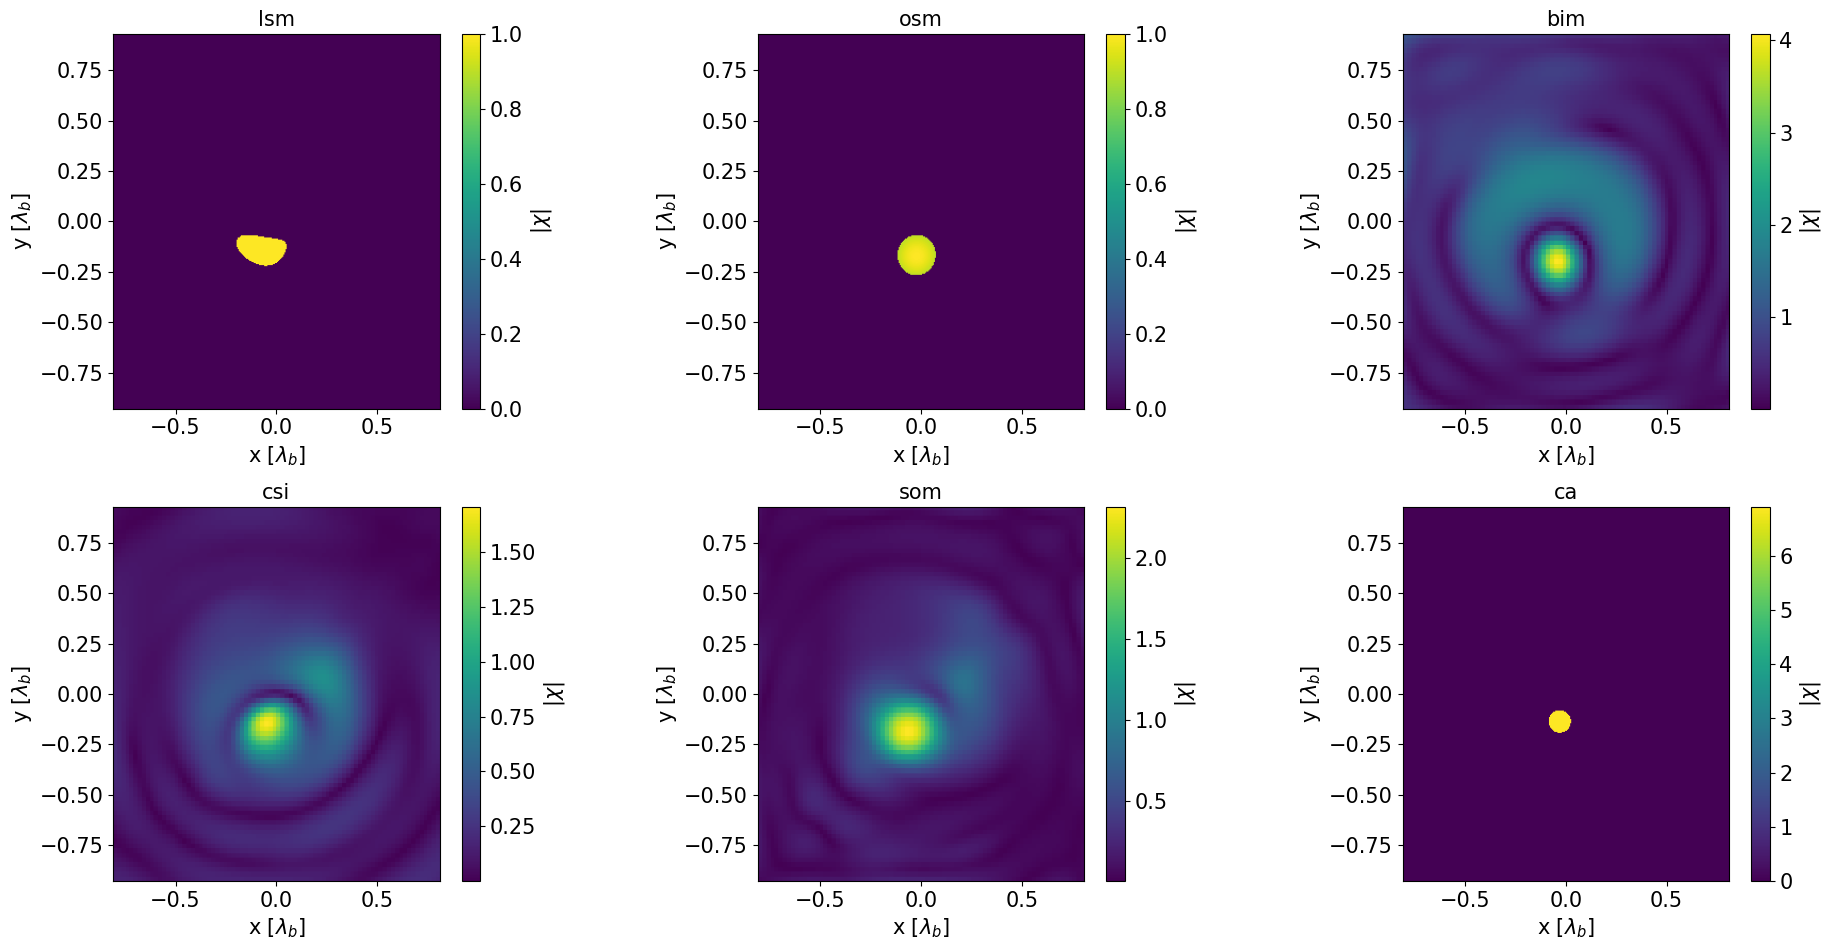

In [4]:
casestudy.reconstruction(fontsize=15, show=True)

In [5]:
from tabulate import tabulate

table = [[casestudy.method[n].alias, casestudy.results[n].zeta_s[-1], 
          casestudy.results[n].zeta_p[-1]] for n in 
         range(len(casestudy.method))]

headers = ['Method', 'Shape error', 'Position error']

print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════╤═══════════════╤══════════════════╕
│ Method   │   Shape error │   Position error │
╞══════════╪═══════════════╪══════════════════╡
│ lsm      │       83.6066 │          2.15762 │
├──────────┼───────────────┼──────────────────┤
│ osm      │       78.6202 │          4.26378 │
├──────────┼───────────────┼──────────────────┤
│ bim      │       57.2404 │          3.13184 │
├──────────┼───────────────┼──────────────────┤
│ csi      │       81.4208 │          3.50108 │
├──────────┼───────────────┼──────────────────┤
│ som      │      118.784  │          1.57689 │
├──────────┼───────────────┼──────────────────┤
│ ca       │       86.4754 │          4.1078  │
╘══════════╧═══════════════╧══════════════════╛


Inverse Solver: Contrast Source Inversion
Alias: csi
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)Stop Criteria
Maximum number of iterations: 1500


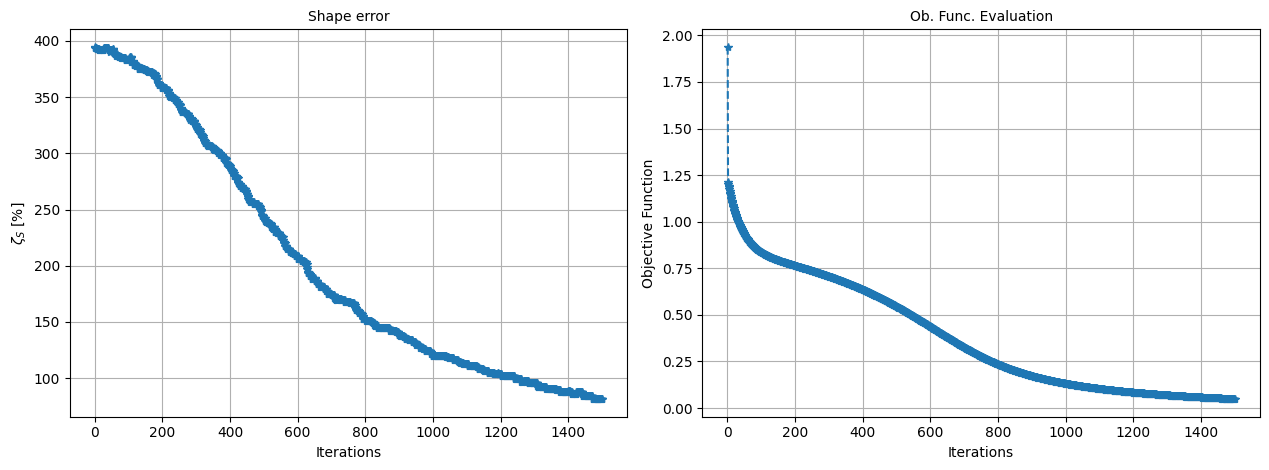

In [6]:
print(casestudy.method[3])
_ = casestudy.results[3].plot_convergence(indicators=['zeta_s', 'objective_function'], show=True)

Inverse Solver: Subspace-based Optimization Method
Alias: som
Method of Moments - CG-FFT (iterations=5000, tolerance=1.0e-03)Stop Criteria
Maximum number of iterations: 100Cut-off index: 15


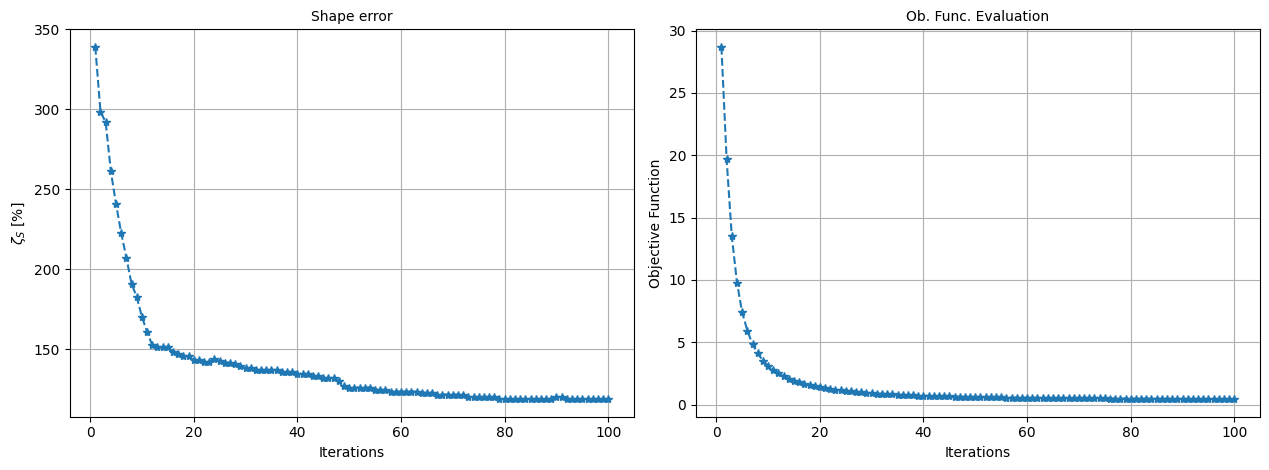

In [7]:
print(casestudy.method[4])
_ = casestudy.results[4].plot_convergence(indicators=['zeta_s', 'objective_function'], show=True)